In [1]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.isotonic import IsotonicRegression as IR
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def isotonic(preds, labels, test_preds):
    preds = np.array(preds)
    labels = np.array(labels)
    test_preds = np.array(test_preds)

    ir = IR(out_of_bounds='clip')
    ir.fit( preds, labels )

    p_calibrated_v = ir.transform( preds )
    p_calibrated_t = ir.transform( test_preds )   # or ir.fit( p_test ), that's the same thing

    return p_calibrated_v, p_calibrated_t

In [2]:
val_preds = pd.read_csv("mimic3models/in_hospital_mortality/val_predictions/Base-Model/LSTM-1.csv")
val_preds

,stay,prediction,y_true
0,28813_episode1_timeseries.csv,0.159558,0
1,91438_episode1_timeseries.csv,0.136324,0
2,6582_episode1_timeseries.csv,0.005732,0
3,83869_episode1_timeseries.csv,0.006182,0
4,30338_episode1_timeseries.csv,0.014453,0
...,...,...,...
3217,24140_episode1_timeseries.csv,0.015982,0
3218,99783_episode2_timeseries.csv,0.032769,1
3219,23872_episode2_timeseries.csv,0.535179,0
3220,65975_episode1_timeseries.csv,0.024294,0


In [3]:
test_pred = pd.read_csv("mimic3models/in_hospital_mortality/test_predictions/Original-Model/LSTM-1-E39/k_lstm.n16.d0.3.dep2.bs8.ts1.0.epoch39.test0.2848591662846242.state.csv")
test_pred

,stay,prediction,y_true
0,10011_episode1_timeseries.csv,0.169675,1
1,10026_episode1_timeseries.csv,0.062662,0
2,10030_episode1_timeseries.csv,0.017861,0
3,10042_episode1_timeseries.csv,0.005058,0
4,10094_episode1_timeseries.csv,0.237630,0
...,...,...,...
3231,9970_episode1_timeseries.csv,0.036495,0
3232,9977_episode1_timeseries.csv,0.005373,0
3233,99863_episode1_timeseries.csv,0.181748,0
3234,99883_episode1_timeseries.csv,0.006251,0


In [7]:
val_pred_calibrated , test_pred_calibrated = isotonic(val_preds['prediction'].to_list(), val_preds['y_true'].to_list(), test_pred['prediction'].to_list())

In [9]:
test_pred['pred_calibrated'] = test_pred_calibrated

,stay,prediction,y_true,pred_calibrated
0,10011_episode1_timeseries.csv,0.169675,1,0.212329
1,10026_episode1_timeseries.csv,0.062662,0,0.094156
2,10030_episode1_timeseries.csv,0.017861,0,0.045455
3,10042_episode1_timeseries.csv,0.005058,0,0.008310
4,10094_episode1_timeseries.csv,0.237630,0,0.260274
...,...,...,...,...
3231,9970_episode1_timeseries.csv,0.036495,0,0.058952
3232,9977_episode1_timeseries.csv,0.005373,0,0.008310
3233,99863_episode1_timeseries.csv,0.181748,0,0.212329
3234,99883_episode1_timeseries.csv,0.006251,0,0.008310


In [ ]:
import matplotlib.pyplot as plt

def plot_calibration_curve(y_true, y_pred, calibrated_probs):
  """
  Plots the sorted original prediction vs calibrated prediction curve for binary classification.

  Args:
      y_true: Ground truth labels (0 or 1).
      y_pred: Predicted probabilities by the model.
      calibrated_probs: Calibrated probabilities after applying calibration technique.
  """
  # Sort together by predicted probabilities
  sorted_data = sorted(zip(y_pred, y_true, calibrated_probs))
  sorted_pred, sorted_true, sorted_calibrated = zip(*sorted_data)

  plt.figure(figsize=(8, 6))
  plt.plot(sorted_pred, label='Original Prediction')
  plt.plot(sorted_calibrated, label='Calibrated Prediction')
  plt.xlabel('Sorted Indices (Increasing Predicted Probability)')
  plt.ylabel('Probability/True Label')
  plt.title('Sorted Original vs. Calibrated Prediction')
  plt.legend()
  plt.grid(True)
  plt.ylim(0, 1.1)  # Adjust y-axis limits for better visualization
  plt.show()


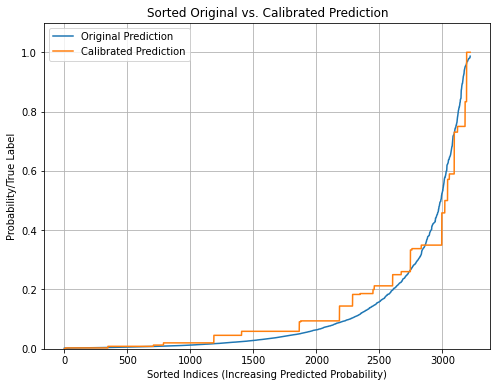

In [15]:
# Sample data (replace with your actual data)
y_true = val_preds['y_true'].to_list()
y_pred = val_preds['prediction'].to_list()

# Perform calibration (replace with your chosen calibration method)
calibrated_probs = val_pred_calibrated 

# Plot the calibration results
plot_calibration_curve(y_true, y_pred, calibrated_probs)
